<a href="https://colab.research.google.com/github/farhanjafri25/TSF-Tasks/blob/master/Task%20-%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task - 3 To explore Unsupervised Machine Learning**

In [73]:
#impoting libraries
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
#Loading the Data
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [75]:
#Renaming the Columns for ease
df.columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width']

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [56]:
df.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [57]:
km = KMeans(n_clusters= 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Visualization of Data

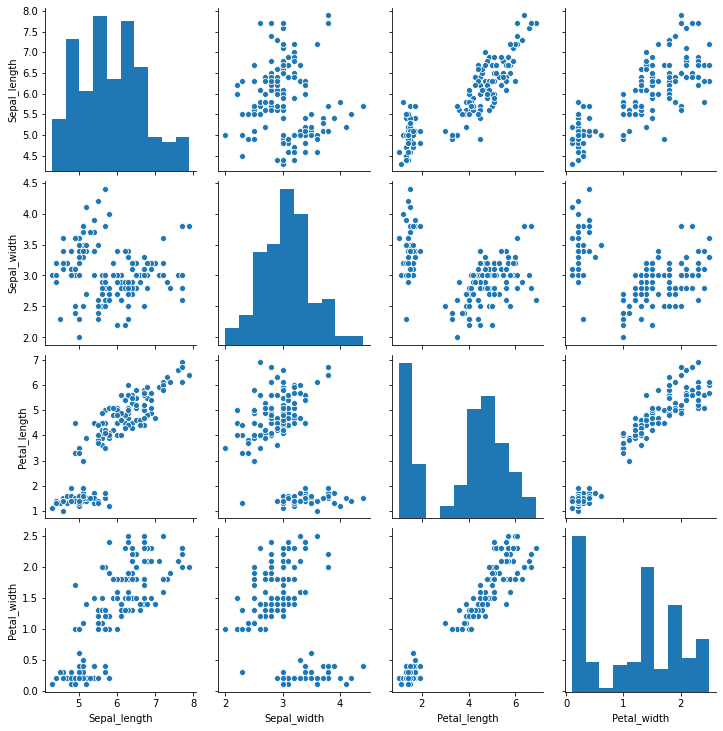

In [58]:
sns.pairplot(df)

**Finding optimum number of clusters using k means**

In [72]:
# Elbow Method
wcss = []

for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method Visualization')

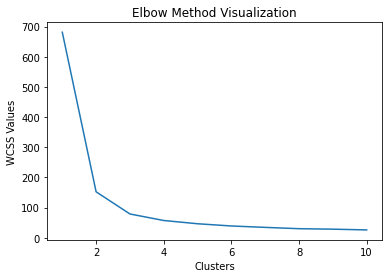

In [60]:
clusters = range(1 , 11)
plt.figure()
plt.plot(clusters, wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS Values')
plt.title ('Elbow Method Visualization')

**For K = 2**

In [61]:
k2 = KMeans(2)
k2.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
#Prediction using the model
iris_pred = df.copy()
iris_pred['Predicted'] = k2.fit_predict(df)

Text(0.5, 1.0, 'Sepal_length vs Senpal_width(k=2)')

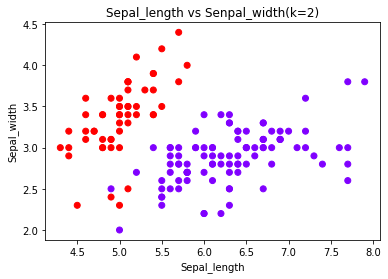

In [63]:
#Visualize the clusters after predicton
plt.figure()
plt.scatter(iris_pred['Sepal_length'] , iris_pred['Sepal_width'], c = iris_pred['Predicted'], cmap= 'rainbow')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.title('Sepal_length vs Senpal_width(k=2)')

***For K = 3***

In [67]:
k3 = KMeans(3)
k3.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Sepal_lemgth vs Sepal_width (k = 3)')

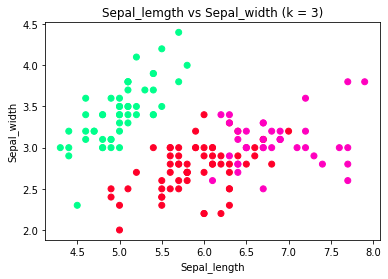

In [71]:
iris_pred2= df.copy()
iris_pred2['Predicted']= k3.fit_predict(df)
plt.figure()
plt.scatter(iris_pred2['Sepal_length'], iris_pred2['Sepal_width'], c = iris_pred2['Predicted'], cmap='gist_rainbow')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.title('Sepal_lemgth vs Sepal_width (k = 3)')

**In 3D**

In [69]:
import plotly.express as ex
ex.scatter_3d(df, 'Sepal_length', 'Sepal_width','Petal_width')